In [3]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
import seaborn as sns

In [4]:
df = pd.read_csv('/Users/aditya/Desktop/ML/train.tsv', sep = '\t')
df.sample(5)

,Unnamed: 0,title,text,subject,date,label
29984,17419,MEDIA COULDN’T BE FOUND DURING BENGHAZI SCANDA...,Not that anyone should be surprised by the lap...,Government News,"Apr 14, 2015",0
24578,12675,Honduras opposition parties ask for disputed e...,Honduras two main opposition parties on Frida...,worldnews,"December 9, 2017",1
6951,7540,Kentucky Republican To Rape Victim: Getting DN...,Republicans care more about protecting rapists...,News,"March 12, 2016",0
1004,15353,Factbox: EU's vision of post-Brexit transition...,The European Union wants a post-Brexit transit...,worldnews,"November 8, 2017",1
7109,10141,FOX NEWS LEGAL ANALYST: Comey’s Big Lie Expose...,Comey lied and has been caught in his lie What...,politics,"Aug 16, 2017",0


In [5]:
df.shape

(30000, 6)

In [6]:
df.loc[:1,"text"]

0    Former CIA director John Brennan on Friday cri...
1    How did this man come to OWN this store? There...
Name: text, dtype: object

In [7]:
df.describe()

,Unnamed: 0,label
count,30000.000000,30000.000000
mean,11207.925800,0.484067
std,6533.101217,0.499754
min,0.000000,0.000000
25%,5560.750000,0.000000
50%,11071.500000,0.000000
75%,16832.500000,1.000000
max,23479.000000,1.000000


In [8]:
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
subject       0
date          0
label         0
dtype: int64

In [9]:
df.head()

,Unnamed: 0,title,text,subject,date,label
0,2619,Ex-CIA head says Trump remarks on Russia inter...,Former CIA director John Brennan on Friday cri...,politicsNews,"July 22, 2017",1
1,16043,YOU WON’T BELIEVE HIS PUNISHMENT! HISPANIC STO...,How did this man come to OWN this store? There...,Government News,"Jun 19, 2017",0
2,876,Federal Reserve governor Powell's policy views...,President Donald Trump on Thursday tapped Fede...,politicsNews,"November 2, 2017",1
3,19963,SCOUNDREL HILLARY SUPPORTER STARTS “TrumpLeaks...,Hillary Clinton ally David Brock is offering t...,left-news,"Sep 17, 2016",0
4,10783,NANCY PELOSI ARROGANTLY DISMISSES Questions on...,Pleading ignorance is a perfect ploy for Nancy...,politics,"May 26, 2017",0


In [10]:
df = df.drop(["date","subject","title","Unnamed: 0"], axis=1)

In [11]:
df.head()

,text,label
0,Former CIA director John Brennan on Friday cri...,1
1,How did this man come to OWN this store? There...,0
2,President Donald Trump on Thursday tapped Fede...,1
3,Hillary Clinton ally David Brock is offering t...,0
4,Pleading ignorance is a perfect ploy for Nancy...,0


In [12]:
true_news = df[df["label"]==1]
bad_news = df[df["label"]==0]

In [13]:
label_count = df['label'].value_counts()

<BarContainer object of 2 artists>

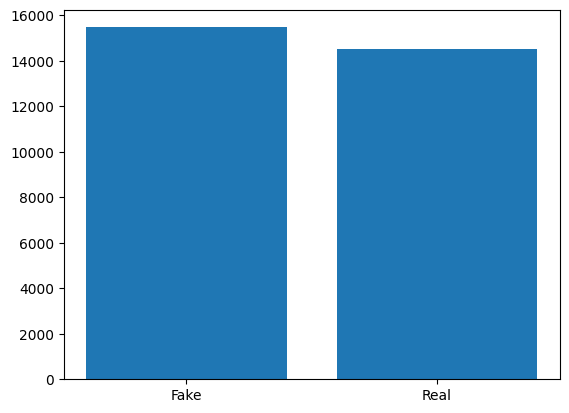

In [14]:
plt.bar(['Fake','Real'],[label_count[0],label_count[1]])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    30000 non-null  object
 1   label   30000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 468.9+ KB


In [16]:
df.duplicated().sum()

2683

In [17]:
df= df.drop_duplicates(keep='first')

In [18]:
df['label'].value_counts()

label
1    14419
0    12898
Name: count, dtype: int64

In [19]:
nltk.download('punkt_tab')
df["num_char"] = df["text"].apply(len)
df["num_word"] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)) )
df["num_sent"] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/aditya/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,text,label,num_char,num_word,num_sent
0,Former CIA director John Brennan on Friday cri...,1,2733,503,16
1,How did this man come to OWN this store? There...,0,2630,491,14
2,President Donald Trump on Thursday tapped Fede...,1,4052,732,13
3,Hillary Clinton ally David Brock is offering t...,0,1131,208,5
4,Pleading ignorance is a perfect ploy for Nancy...,0,1061,183,7


In [20]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aditya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords # import stopwords from nltk.corpus
from string import punctuation # import punctuation from string
import nltk
import string

In [22]:
def transform_text(text):
    ps = PorterStemmer()
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y = []
    for i in text:
        if i not in stopwords.words('english') and i not in punctuation:
            y.append(i)
    text = y[:]
    y = []
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)


In [23]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [24]:
df['text']

0        Former CIA director John Brennan on Friday cri...
1        How did this man come to OWN this store? There...
2        President Donald Trump on Thursday tapped Fede...
3        Hillary Clinton ally David Brock is offering t...
4        Pleading ignorance is a perfect ploy for Nancy...
                               ...                        
29995    The chief executive of the U.S. Aerospace Indu...
29996    The following are highlights of the maiden pol...
29997    If there s one thing President Barack Obama is...
29998    The Syrian army and its allies have taken full...
29999    The United States will give Israel $38 billion...
Name: text, Length: 27317, dtype: object

In [25]:
ps = PorterStemmer()
ps.stem('going')

'go'

In [26]:
df['transformed_text']=df['text'].apply(transform_text)

In [28]:
df.head()

,text,label,num_char,num_word,num_sent,transformed_text
0,Former CIA director John Brennan on Friday cri...,1,2733,503,16,former cia director john brennan friday critic...
1,How did this man come to OWN this store? There...,0,2630,491,14,man come store inform much fraudster except st...
2,President Donald Trump on Thursday tapped Fede...,1,4052,732,13,presid donald trump thursday tap feder reserv ...
3,Hillary Clinton ally David Brock is offering t...,0,1131,208,5,hillari clinton alli david brock offer pay new...
4,Pleading ignorance is a perfect ploy for Nancy...,0,1061,183,7,plead ignor perfect ploy nanci pelosi believ c...


In [30]:
from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')

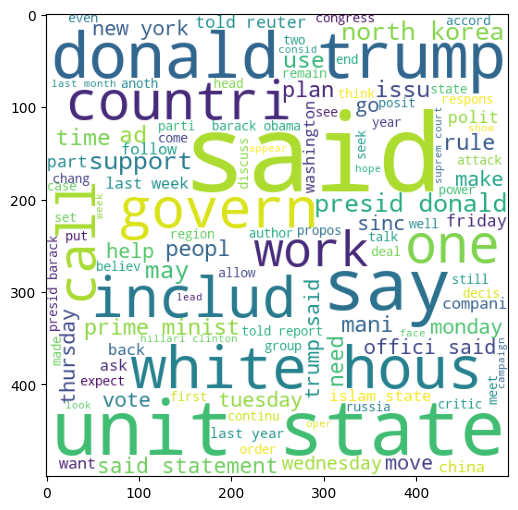

In [31]:
spam_wc = wc.generate(df[df['label'] == 1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [32]:
real = []
for msg in df[df['label'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        real.append(word)
        

In [33]:
len(real)

3168849

In [34]:
fake = []
for msg in df[df['label'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        fake.append(word)

In [35]:
len(fake)

2907562

In [36]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [37]:
X = tfidf.fit_transform(df['transformed_text']).toarray()
y = df['label'].values

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [40]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [41]:
gauss = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [42]:
def predict(model):
    model.fit(X_train,y_train)
    y_pred1 = model.predict(X_test)
    print(f'The accuracy score of model is {accuracy_score(y_test,y_pred1)}')
    print(f'The confusion matrix of model is\n {confusion_matrix(y_test,y_pred1)}')
    print(f'The precison score of model is {precision_score(y_test,y_pred1)}')


In [43]:
predict(gauss)

The accuracy score of model is 0.8993411420204978
The confusion matrix of model is
 [[2362  175]
 [ 375 2552]]
The precison score of model is 0.9358269160249358


In [44]:
predict(mnb)

The accuracy score of model is 0.9145314787701317
The confusion matrix of model is
 [[2307  230]
 [ 237 2690]]
The precison score of model is 0.9212328767123288


In [45]:
predict(bnb)

The accuracy score of model is 0.9344802342606149
The confusion matrix of model is
 [[2341  196]
 [ 162 2765]]
The precison score of model is 0.933806146572104


In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [51]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [52]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [53]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [54]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9745607613469985, 0.970945945945946)

In [55]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9745607613469985
Precision -  0.970945945945946
For  KN
Accuracy -  0.6727672035139092
Precision -  0.9178283198826119
For  NB
Accuracy -  0.9145314787701317
Precision -  0.9212328767123288
For  DT
Accuracy -  0.8890922401171303
Precision -  0.8885169065952461
For  LR
Accuracy -  0.9705344070278185
Precision -  0.9675456389452333
For  RF
Accuracy -  0.9628477306002928
Precision -  0.9561286001339585
For  AdaBoost
Accuracy -  0.9511346998535871
Precision -  0.9551676933607118
For  BgC
Accuracy -  0.9456442166910688
Precision -  0.9460651289009498
For  ETC
Accuracy -  0.9597364568081991
Precision -  0.9540422676954042
For  GBDT
Accuracy -  0.9264275256222547
Precision -  0.9255139871924503
For  xgb
Accuracy -  0.9701683748169839
Precision -  0.9634473507712944


In [56]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [57]:
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.974561,0.970946
4,LR,0.970534,0.967546
10,xgb,0.970168,0.963447
5,RF,0.962848,0.956129
6,AdaBoost,0.951135,0.955168
8,ETC,0.959736,0.954042
7,BgC,0.945644,0.946065
9,GBDT,0.926428,0.925514
2,NB,0.914531,0.921233
1,KN,0.672767,0.917828


In [58]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [59]:
performance_df1

,Algorithm,variable,value
0,SVC,Accuracy,0.974561
1,LR,Accuracy,0.970534
2,xgb,Accuracy,0.970168
3,RF,Accuracy,0.962848
4,AdaBoost,Accuracy,0.951135
5,ETC,Accuracy,0.959736
6,BgC,Accuracy,0.945644
7,GBDT,Accuracy,0.926428
8,NB,Accuracy,0.914531
9,KN,Accuracy,0.672767


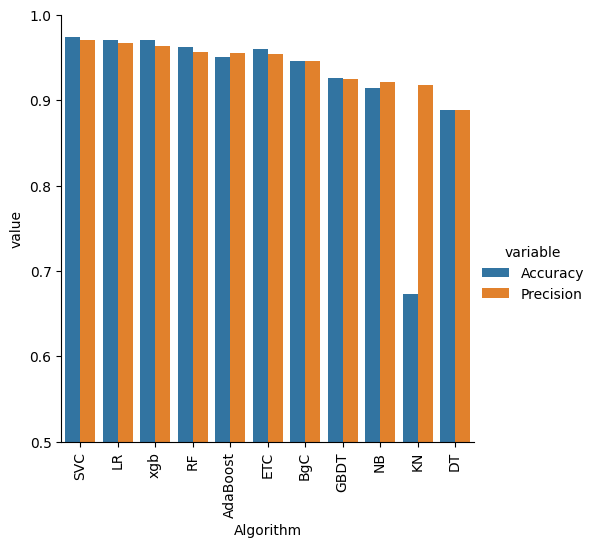

In [60]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [61]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [62]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [63]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [64]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [65]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [66]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,SVC,0.974561,0.970946,0.974561,0.970946,0.974561,0.970946,0.974561,0.970946
1,LR,0.970534,0.967546,0.970534,0.967546,0.970534,0.967546,0.970534,0.967546
2,xgb,0.970168,0.963447,0.970168,0.963447,0.970168,0.963447,0.970168,0.963447
3,RF,0.962848,0.956129,0.962848,0.956129,0.962848,0.956129,0.962848,0.956129
4,AdaBoost,0.951135,0.955168,0.951135,0.955168,0.951135,0.955168,0.951135,0.955168
5,ETC,0.959736,0.954042,0.959736,0.954042,0.959736,0.954042,0.959736,0.954042
6,BgC,0.945644,0.946065,0.945644,0.946065,0.945644,0.946065,0.945644,0.946065
7,GBDT,0.926428,0.925514,0.926428,0.925514,0.926428,0.925514,0.926428,0.925514
8,NB,0.914531,0.921233,0.914531,0.921233,0.914531,0.921233,0.914531,0.921233
9,KN,0.672767,0.917828,0.672767,0.917828,0.672767,0.917828,0.672767,0.917828


In [67]:

svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)



In [72]:
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [69]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [70]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9681551976573939
Precision 0.9648767308341777


In [73]:
import pickle
with open('voting_classifier_model.pkl', 'wb') as file:
    pickle.dump(voting, file)
